In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data)
clinical_df = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
data_df = pd.merge(mouse_df,clinical_df, on="Mouse ID")

# Display the data table for preview
data_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_Tumor_Volume = data_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
# Convert to DataFrame and rename last column
Mean_Tumor_df = pd.DataFrame(Mean_Tumor_Volume)
Mean_Tumor_df = Mean_Tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

# Preview DataFrame
Mean_Tumor_df.head()


,Drug,Timepoint,Mean Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [22]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_Tumor_Volume = data_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()

# Convert to DataFrame and rename last column
SE_Tumor_df = pd.DataFrame(SE_Tumor_Volume)
SE_Tumor_df = SE_Tumor_df.rename(columns={"Tumor Volume (mm3)": "SEM for Tumor Volume"})

# Preview DataFrame
SE_Tumor_df


,Drug,Timepoint,SEM for Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [23]:
# Minor Data Munging to Re-Format the Data Frames
Mean_Tumor_df_Munged = Mean_Tumor_df.pivot(index="Timepoint",columns="Drug",values="Mean Tumor Volume")
# Preview that Reformatting worked
Mean_Tumor_df_Munged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [24]:
# Minor Data Munging to Re-Format the Data Frames
SE_Tumor_df_Munged = SE_Tumor_df.pivot(index="Timepoint",columns="Drug",values="SEM for Tumor Volume")
# Preview that Reformatting worked
SE_Tumor_df_Munged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


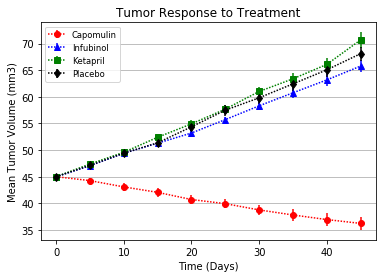

In [42]:
# Generate the Plot (with Error Bars)
x_axis = Mean_Tumor_df_Munged.index

drugs = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
marker = {"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]}

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.grid(axis="y")


#ErrorBars/Final Plot
for drug in drugs:
    plt.errorbar(x_axis, Mean_Tumor_df_Munged[drug],SE_Tumor_df_Munged[drug], 
                linestyle = (0, (1, 1)), color = marker[drug][1], marker = marker[drug][0])

plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"], loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig(os.path.join("..","Images","Tumor_Response_To_Treatment.png"))



In [26]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [27]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Met_Site = data_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().reset_index()

# Convert to DataFrame and rename last column
Mean_Met_Site_df = pd.DataFrame(Mean_Met_Site)
Mean_Met_Site_df = Mean_Met_Site_df.rename(columns={"Metastatic Sites": "Mean for Metastatic Sites"})


# Preview DataFrame
Mean_Met_Site_df

,Drug,Timepoint,Mean for Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [28]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_Met_Site = data_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()

# Convert to DataFrame and rename last column
SE_Met_Site_df = pd.DataFrame(SE_Met_Site)
SE_Met_Site_df = SE_Met_Site_df.rename(columns={"Metastatic Sites": "SEM for Metastatic Sites"})

# Preview DataFrame
SE_Met_Site_df.head()

,Drug,Timepoint,SEM for Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [29]:
# Minor Data Munging to Re-Format the Data Frames
Mean_Met_Site_df_Munged= Mean_Met_Site_df.pivot(index = "Timepoint",columns = "Drug",values="Mean for Metastatic Sites")
# Preview that Reformatting worked
Mean_Met_Site_df_Munged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [30]:
# Minor Data Munging to Re-Format the Data Frames
SE_Met_Site_df_Munged= SE_Met_Site_df.pivot(index = "Timepoint",columns = "Drug",values="SEM for Metastatic Sites")
# Preview that Reformatting worked
Mean_Met_Site_df_Munged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


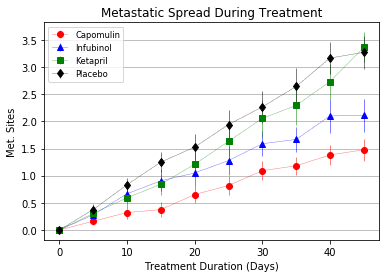

In [40]:
# Generate the Plot (with Error Bars)
x_axis = Mean_Tumor_df_Munged.index

drugs = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
marker = {"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]}

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(axis="y")

for drug in drugs:
    plt.errorbar(x_axis, Mean_Met_Site_df_Munged[drug],SE_Met_Site_df_Munged[drug], 
                linestyle = (0, (1, 1)), linewidth=0.5, color = marker[drug][1], marker = marker[drug][0])

plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"], loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig(os.path.join("..","Images","Metastatic_Spread_During_Treatment.png"))
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [32]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mouse_Count = data_df.groupby(["Drug","Timepoint"])["Mouse ID"].count().reset_index()
# Convert to DataFrame and rename last column
Mouse_Count_df = pd.DataFrame(Mouse_Count)
Mouse_Count_df = Mouse_Count_df.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
Mouse_Count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [33]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_Count_df_Munged= Mouse_Count_df.pivot(index = "Timepoint",columns = "Drug",values="Mouse Count")
# Preview the Data Frame
Mouse_Count_df_Munged.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


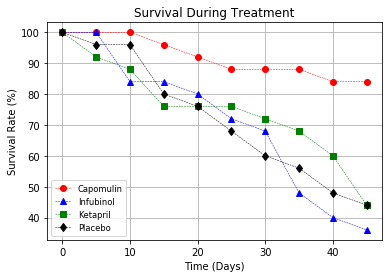

In [41]:
# Generate the Plot (Accounting for percentages)
x_axis = Mean_Tumor_df_Munged.index

drugs = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
marker = {"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]}

#Base Mouse Count is 25 for each of the drugs in question
Base_Mouse_Count = 25

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()


for drug in drugs:
    survival_rate = (Mouse_Count_df_Munged[drug]/Base_Mouse_Count)*100
    survival_rate_plt = plt.plot(x_axis, survival_rate, linestyle = "--", linewidth=0.5, color = marker[drug][1], marker = marker[drug][0])

plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"], loc="best", fontsize="small", fancybox=True)    
# Save the Figure
plt.savefig(os.path.join("..","Images","Survival_During_Treatment.png"))
# Show the Figure
plt.show()  

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [95]:
# Calculate the percent changes for each drug
percentage_change = (Mean_Tumor_df_Munged.iloc[-1]/Mean_Tumor_df_Munged.iloc[0]-1)*100
# Display the data to confirm
print(percentage_change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


<BarContainer object of 4 artists>

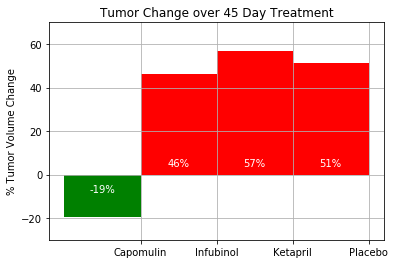

In [151]:
# Store all Relevant Percent Changes into a Tuple
Percent_Change_ByDrug = [percentage_change["Capomulin"],percentage_change["Infubinol"],percentage_change["Ketapril"],percentage_change["Placebo"]]

# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
drugs = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
Bar_Plot = plt.bar(drugs, Percent_Change_ByDrug, width=-1,align="edge", color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change over 45 Day Treatment")

# Use functions to label the percentages of change
def label(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 4
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                "%d" % int(height)+"%",color="w",
                ha="center")

# Call functions to implement the function calls
label(Bar_Plot)

# Save the Figure
plt.savefig(os.path.join("..","Images","Tumor_Change_Over_45_Days.png"))

# Show the Figure
Bar_Plot

![Metastatic Spread During Treatment](../Images/change.png)

In [44]:
#Three observable trends in the data
print("1) Capomulin is much more effective relative to Infubinol, Ketapril and the Placebo in every metric examined. Capomulin is the only treatment that reduced tumor volume over a 45 day period. Its survival rates are much hihger. Its number of metastic sites is much lower, and its mean tumor volume is much lower as well. Errorbars also seem to be shorter for Capomulin which denotes the fact that its data is more precise.")
print("2) The performance metrics of the placebo are closely in line with the performance metrics of Ketapril which does not bode well for Ketapril or, perhaps, denotes some psychological phenomenon occuring in the Placebo group. We do not have enough data to dig depper into that psychological phenomenon question.")
print("3) Except for the final bar plot, all of the data points examined for each drug are trending in the same direction over time which is measured in days. For that reason, the last bar plot really stands out as evidence of the superiority of Capomulin. It reduced tumor volume in mice over a 45 day period whereas every other drug increased tumor volume more than 40% over that time period.")


1) Capomulin is much more effective relative to Infubinol, Ketapril and the Placebo in every metric examined. Capomulin is the only treatment that reduced tumor volume over a 45 day period. Its survival rates are much hihger. Its number of metastic sites is much lower, and its mean tumor volume is much lower as well. Errorbars also seem to be shorter for Capomulin which denotes the fact that its data is more precise.
2) The performance metrics of the placebo are closely in line with the performance metrics of Ketapril which does not bode well for Ketapril or, perhaps, denotes some psychological phenomenon occuring in the Placebo group. We do not have enough data to dig depper into that psychological phenomenon question.
3) Except for the final bar plot, all of the data points examined for each drug are trending in the same direction over time which is measured in days. For that reason, the last bar plot really stands out as evidence of the superiority of Capomulin. It reduced tumor vol